In [ ]:
from PIL import Image
from PIL import ImageFilter
from collections import *
import numpy as np

In [ ]:
import cv2

In [ ]:
def read_file(filename):
    img = cv2.imread(filename)
    return img

In [ ]:
img = read_file("Documents/Geospatial/MALLS IMG/Paya Lebar Quarter.jpeg")

In [ ]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

In [ ]:
def findCountours(image):

    contoured_image = image
    gray = cv2.cvtColor(contoured_image, cv2.COLOR_BGR2GRAY) 
    edged = cv2.Canny(gray, 30, 100)
    contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(contoured_image, contours, contourIdx=-1, color=1, thickness=1)
    cv2.imshow('Image after countouring', contoured_image)

    return contoured_image

In [ ]:
findCountours(img)

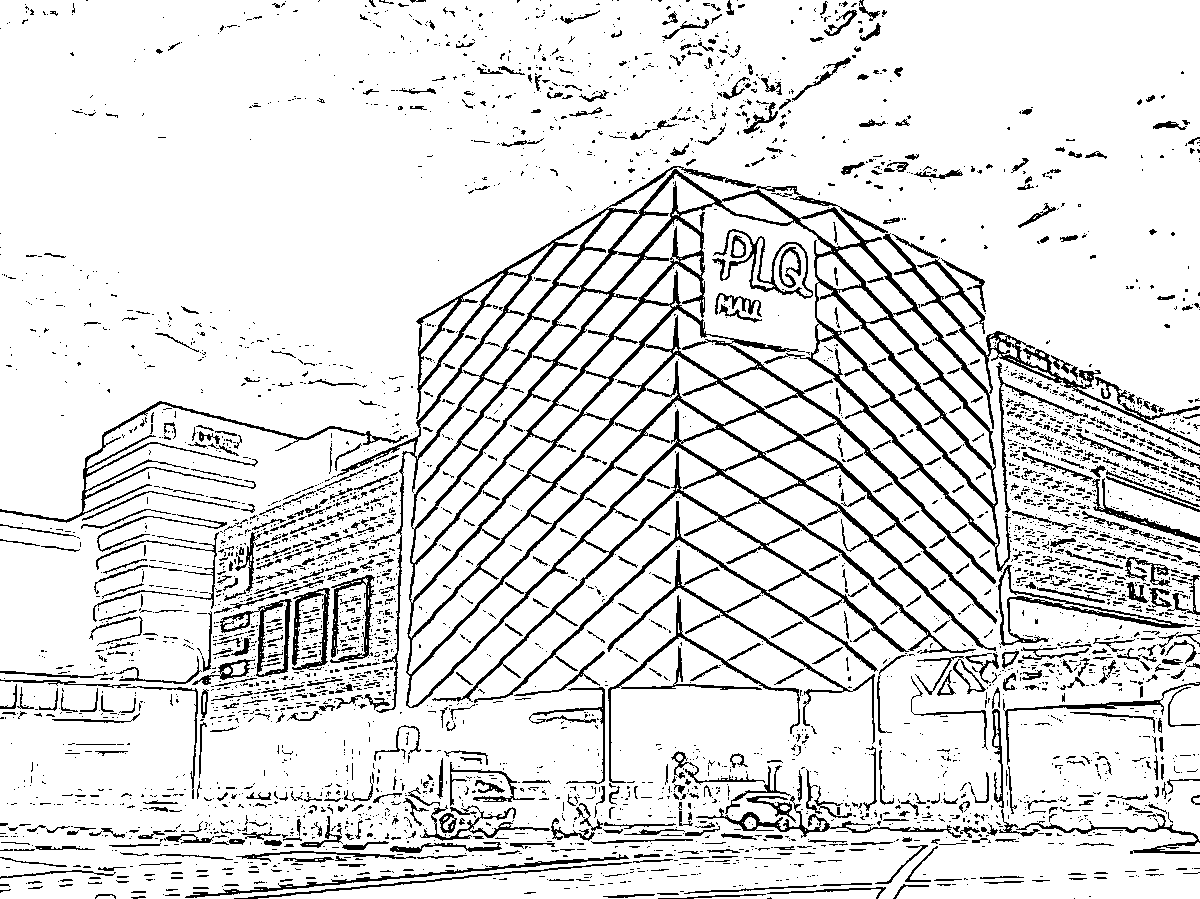

In [190]:
line_size = 5
blur_value = 5
edges = edge_mask(img, line_size, blur_value)
Image.fromarray(edges)

In [191]:
def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1, 3))

    # Determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [192]:
total_color = 18
img = color_quantization(img, total_color)

In [193]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)

In [194]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

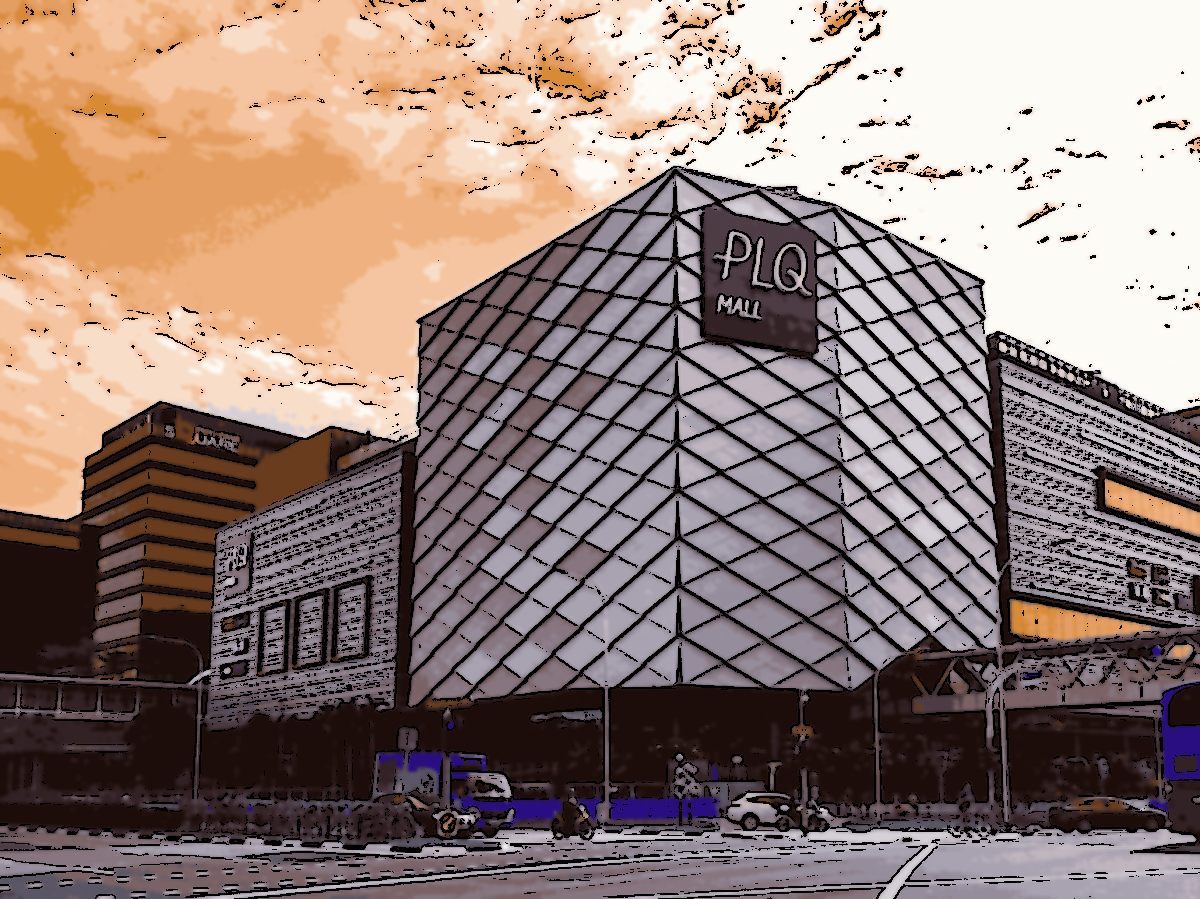

In [195]:
Image.fromarray(cartoon)